# Hoofdstuk 21 First_Order_Quan

In [1]:
from mpl_toolkits.axisartist.axislines import SubplotZero
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import mpl_toolkits.mplot3d.art3d as art3d
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
import matplotlib
import numpy as np
import random
from sympy import *
matplotlib.rcParams["font.family"] = "monospace"
matplotlib.rcParams['font.style'] = "italic"
plt.rcParams.update({'mathtext.default':  'regular' })

In [2]:
def Euler_v(x_coord, dt, duur):
    x, tijd = [], []
    for n in range(duur):
        x.append(x_coord)
        tijd.append(n*dt)
        dx = 9.81-5.28*x_coord/75
        x_coord = x_coord + dx * dt
    return (x, tijd)

### Euler1

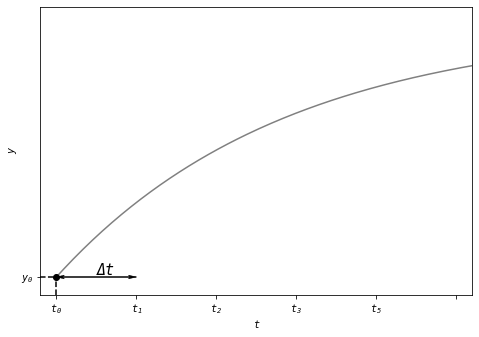

In [3]:
figEuler1 = plt.figure(figsize=(6,4))
axEuler1 = figEuler1.add_axes([0,0,1,1])
axEuler1.set_xlim(-1, 26)
axEuler1.set_ylim(-10, 150)
axEuler1.set_yticks([0])
axEuler1.set_xticks([0, 5, 10, 15, 20, 25])
labels_x = [item.get_text() for item in axEuler1.get_xticklabels()]
labels_x[0] = 't$_0$'
labels_x[1] = 't$_1$'
labels_x[2] = 't$_2$'
labels_x[3] = 't$_3$'
labels_x[4] = 't$_4$'
labels_x[4] = 't$_5$'
axEuler1.set_xticklabels(labels_x)
labels_y = [item.get_text() for item in axEuler1.get_yticklabels()]
labels_y[0] = 'y$_0$'
axEuler1.set_yticklabels(labels_y)

import sympy as sp

t = sp.symbols("t")
v = sp.Function('v')
r=5.25
m=75
eq = sp.Eq(9.81-r*v(t)/m, sp.diff(v(t), t))
diff = sp.solvers.ode.dsolve(eq, v(t), ics={v(0): 0})
lam_t = sp.lambdify(t, diff.rhs)
t = np.linspace(0, 30, 200)
axEuler1.plot(t, lam_t(t), color='grey')
axEuler1.plot([0, 0], [-10, 0], color='black', ls='--')
axEuler1.plot([-1, 0], [0, 0], color='black', ls='--')

axEuler1.scatter([0], [0], color='black', zorder=20)
axEuler1.arrow(0, 0, 5, 0., fc='k', ec='k', lw = .5, head_width=2, head_length=0.5, overhang = 0.3, length_includes_head= True, clip_on = False)
axEuler1.arrow(5, 0, -5, 0., fc='k', ec='k', lw = .5, head_width=2, head_length=0.5, overhang = 0.3, length_includes_head= True, clip_on = False)

axEuler1.text(2.5, 1, '\u0394t', color="black", size=15)
axEuler1.set_xlabel('t')
axEuler1.set_ylabel('y')
figEuler1.savefig("Euler1.pdf",bbox_inches='tight')
plt.show()

### Euler2

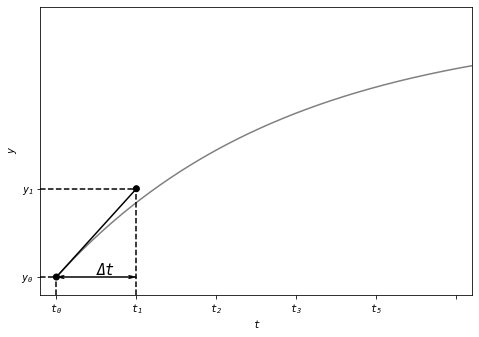

In [4]:
figEuler2 = plt.figure(figsize=(6,4))
axEuler2 = figEuler2.add_axes([0,0,1,1])
axEuler2.set_xlim(-1, 26)
axEuler2.set_ylim(-10, 150)
axEuler2.set_xticks([0, 5, 10, 15, 20, 25])
labels_x = [item.get_text() for item in axEuler2.get_xticklabels()]
labels_x[0] = 't$_0$'
labels_x[1] = 't$_1$'
labels_x[2] = 't$_2$'
labels_x[3] = 't$_3$'
labels_x[4] = 't$_4$'
labels_x[4] = 't$_5$'
axEuler2.set_xticklabels(labels_x)

t = np.linspace(0, 30, 200)
axEuler2.plot(t, lam_t(t), color='grey')
x, t = Euler_v(0, 5, 2)

axEuler2.plot(t, x, color='black')

col = ['black', 'black']
axEuler2.scatter(t, x, color=col, zorder=20)
for i, value in enumerate(x):
    axEuler2.plot([t[i], t[i]], [-10, value], color=col[i], ls='--')
    axEuler2.plot([-1, t[i]], [value, value], color=col[i], ls='--')
axEuler2.arrow(0, 0, 5, 0., fc='k', ec='k', lw = .5, head_width=2, head_length=0.5, overhang = 0.3, length_includes_head= True, clip_on = False)
axEuler2.arrow(5, 0, -5, 0., fc='k', ec='k', lw = .5, head_width=2, head_length=0.5, overhang = 0.3, length_includes_head= True, clip_on = False)

axEuler2.text(2.5, 1, '\u0394t', color="black", size=15)
axEuler2.set_xlabel('t')
axEuler2.set_ylabel('y')
axEuler2.set_yticks(x)
labels_y = [item.get_text() for item in axEuler2.get_yticklabels()]
labels_y[0] = 'y$_0$'
labels_y[1] = 'y$_1$'
axEuler2.set_yticklabels(labels_y)
figEuler2.savefig("Euler2.pdf",bbox_inches='tight')
plt.show()

### Euler3

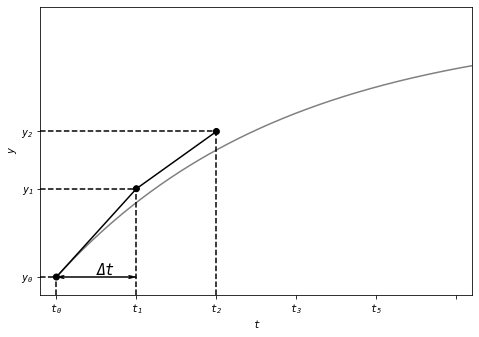

In [5]:
figEuler3 = plt.figure(figsize=(6,4))
axEuler3 = figEuler3.add_axes([0,0,1,1])
axEuler3.set_xlim(-1, 26)
axEuler3.set_ylim(-10, 150)
axEuler3.set_xticks([0, 5, 10, 15, 20, 25])
labels_x = [item.get_text() for item in axEuler3.get_xticklabels()]
labels_x[0] = 't$_0$'
labels_x[1] = 't$_1$'
labels_x[2] = 't$_2$'
labels_x[3] = 't$_3$'
labels_x[4] = 't$_4$'
labels_x[4] = 't$_5$'
axEuler3.set_xticklabels(labels_x)

t = np.linspace(0, 30, 200)
axEuler3.plot(t, lam_t(t), color='grey')
x, t = Euler_v(0, 5, 3)

axEuler3.plot(t, x, color='black')

col = ['black', 'black', 'black']
axEuler3.scatter(t, x, color=col, zorder=20)
for i, value in enumerate(x):
    axEuler3.plot([t[i], t[i]], [-10, value], color=col[i], ls='--')
    axEuler3.plot([-1, t[i]], [value, value], color=col[i], ls='--')
axEuler3.arrow(0, 0, 5, 0., fc='k', ec='k', lw = .5, head_width=2, head_length=0.5, overhang = 0.3, length_includes_head= True, clip_on = False)
axEuler3.arrow(5, 0, -5, 0., fc='k', ec='k', lw = .5, head_width=2, head_length=0.5, overhang = 0.3, length_includes_head= True, clip_on = False)

axEuler3.text(2.5, 1, '\u0394t', color="black", size=15)
axEuler3.set_xlabel('t')
axEuler3.set_ylabel('y')
axEuler3.set_yticks(x)
labels_y = [item.get_text() for item in axEuler3.get_yticklabels()]
labels_y[0] = 'y$_0$'
labels_y[1] = 'y$_1$'
labels_y[2] = 'y$_2$'
axEuler3.set_yticklabels(labels_y)
figEuler3.savefig("Euler3.pdf",bbox_inches='tight')
plt.show()

### Euler4

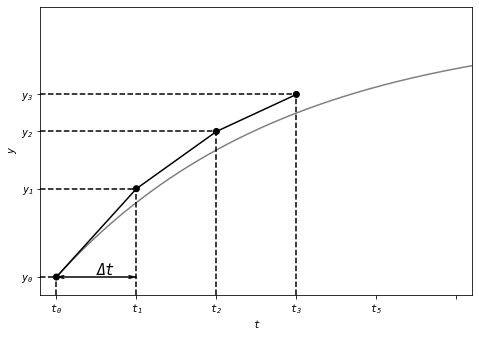

In [6]:
figEuler4 = plt.figure(figsize=(6,4))
axEuler4 = figEuler4.add_axes([0,0,1,1])
axEuler4.set_xlim(-1, 26)
axEuler4.set_ylim(-10, 150)
axEuler4.set_xticks([0, 5, 10, 15, 20, 25])
labels_x = [item.get_text() for item in axEuler4.get_xticklabels()]
labels_x[0] = 't$_0$'
labels_x[1] = 't$_1$'
labels_x[2] = 't$_2$'
labels_x[3] = 't$_3$'
labels_x[4] = 't$_4$'
labels_x[4] = 't$_5$'
axEuler4.set_xticklabels(labels_x)

t = np.linspace(0, 30, 200)
axEuler4.plot(t, lam_t(t), color='grey')
x, t = Euler_v(0, 5, 4)

axEuler4.plot(t, x, color='black')

col = ['black', 'black', 'black', 'black']
axEuler4.scatter(t, x, color=col, zorder=20)
for i, value in enumerate(x):
    axEuler4.plot([t[i], t[i]], [-10, value], color=col[i], ls='--')
    axEuler4.plot([-1, t[i]], [value, value], color=col[i], ls='--')
axEuler4.arrow(0, 0, 5, 0., fc='k', ec='k', lw = .5, head_width=2, head_length=0.5, overhang = 0.3, length_includes_head= True, clip_on = False)
axEuler4.arrow(5, 0, -5, 0., fc='k', ec='k', lw = .5, head_width=2, head_length=0.5, overhang = 0.3, length_includes_head= True, clip_on = False)

axEuler4.text(2.5, 1, '\u0394t', color="black", size=15)
axEuler4.set_xlabel('t')
axEuler4.set_ylabel('y')
axEuler4.set_yticks(x)
labels_y = [item.get_text() for item in axEuler4.get_yticklabels()]
labels_y[0] = 'y$_0$'
labels_y[1] = 'y$_1$'
labels_y[2] = 'y$_2$'
labels_y[3] = 'y$_3$'
axEuler4.set_yticklabels(labels_y)
figEuler4.savefig("Euler4.pdf",bbox_inches='tight')
plt.show()

### Euler5

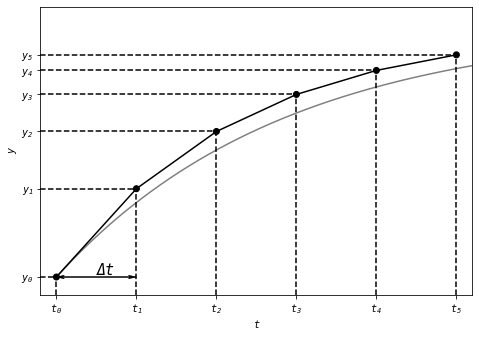

In [7]:
figEuler5 = plt.figure(figsize=(6,4))
axEuler5 = figEuler5.add_axes([0,0,1,1])
axEuler5.set_xlim(-1, 26)
axEuler5.set_ylim(-10, 150)
axEuler5.set_xticks([0, 5, 10, 15, 20, 25])
labels_x = [item.get_text() for item in axEuler5.get_xticklabels()]
labels_x[0] = 't$_0$'
labels_x[1] = 't$_1$'
labels_x[2] = 't$_2$'
labels_x[3] = 't$_3$'
labels_x[4] = 't$_4$'
labels_x[5] = 't$_5$'
axEuler5.set_xticklabels(labels_x)

t = np.linspace(0, 30, 200)
axEuler5.plot(t, lam_t(t), color='grey')
x, t = Euler_v(0, 5, 6)

axEuler5.plot(t, x, color='black')

col = ['black', 'black', 'black', 'black', 'black', 'black']
axEuler5.scatter(t, x, color=col, zorder=20)
for i, value in enumerate(x):
    axEuler5.plot([t[i], t[i]], [-10, value], color=col[i], ls='--')
    axEuler5.plot([-1, t[i]], [value, value], color=col[i], ls='--')
axEuler5.arrow(0, 0, 5, 0., fc='k', ec='k', lw = .5, head_width=2, head_length=0.5, overhang = 0.3, length_includes_head= True, clip_on = False)
axEuler5.arrow(5, 0, -5, 0., fc='k', ec='k', lw = .5, head_width=2, head_length=0.5, overhang = 0.3, length_includes_head= True, clip_on = False)

axEuler5.text(2.5, 1, '\u0394t', color="black", size=15)
axEuler5.set_xlabel('t')
axEuler5.set_ylabel('y')
axEuler5.set_yticks(x)
labels_y = [item.get_text() for item in axEuler5.get_yticklabels()]
labels_y[0] = 'y$_0$'
labels_y[1] = 'y$_1$'
labels_y[2] = 'y$_2$'
labels_y[3] = 'y$_3$'
labels_y[4] = 'y$_4$'
labels_y[5] = 'y$_5$'
axEuler5.set_yticklabels(labels_y)
figEuler5.savefig("Euler5.pdf",bbox_inches='tight')
plt.show()

### exEuler1

In [8]:
def norm(x, y):
    length = np.hypot(x, y)
    return (x/length, y/length, length)

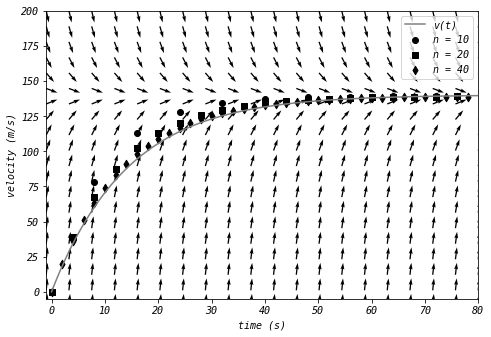

In [9]:
figexEuler1 = plt.figure(figsize=(6,4))
axexEuler1 = figexEuler1.add_axes([0,0,1,1])
axexEuler1.set_xlim(-1, 80)
axexEuler1.set_ylim(-5, 200)

t = np.linspace(0, 80, 200)
axexEuler1.plot(t, lam_t(t), color='grey', label='v(t)')

mark = ['o', 's', 'd']
n = [10, 20, 40]
dt = [8, 4, 2]
for i, value in enumerate(n):
    x, t = Euler_v(0, dt[i], value)
    axexEuler1.scatter(t, x, color='black', marker=mark[i], label='n = {}'.format(value))
    
x,y = np.linspace(-1,80,20),np.linspace(-10,200,20)
x,y = np.meshgrid(x,y)
dx, dy = 1, 9.81-5.28*y/75
dx, dy, length = norm(dx, dy)
qq = axexEuler1.quiver(x,y,dx,dy, color='black')

axexEuler1.set_xlabel('time (s)')
axexEuler1.set_ylabel('velocity (m/s)')
axexEuler1.legend()
figexEuler1.savefig("exEuler1.pdf",bbox_inches='tight')
plt.show()

### exEuler1Fout

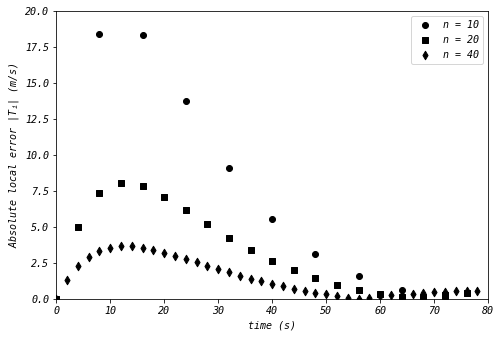

In [10]:
figexEuler1fout = plt.figure(figsize=(6,4))
axexEuler1fout = figexEuler1fout.add_axes([0,0,1,1])
axexEuler1fout.set_xlim(0, 80)
axexEuler1fout.set_ylim(0, 20)

mark = ['o', 's', 'd']
n = [10, 20, 40]
dt = [8, 4, 2]
for i, value in enumerate(n):
    x, t = Euler_v(0, dt[i], value)
    error = np.abs(x - lam_t(np.array(t)))
    axexEuler1fout.scatter(t, error, color='black', marker=mark[i], label='n = {}'.format(value))

axexEuler1fout.set_xlabel('time (s)')
axexEuler1fout.set_ylabel('Absolute local error |T$_i$| (m/s)')
axexEuler1fout.legend()
figexEuler1fout.savefig("exEuler1fout.pdf",bbox_inches='tight')
plt.show()

### exEulervdotdot

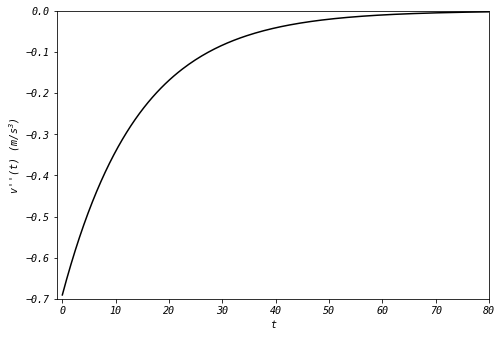

In [11]:
figexEulervdotdot = plt.figure(figsize=(6,4))
axexEulervdotdot = figexEulervdotdot.add_axes([0,0,1,1])
axexEulervdotdot.set_xlim(-1, 80)
axexEulervdotdot.set_ylim(-0.7, 0)

t = np.linspace(0, 80, 200)
axexEulervdotdot.plot(t, -0.690624 + 0.690624*np.exp(-0.0704*t)*(-1. + np.exp(0.0704*t)), color='black')

axexEulervdotdot.set_xlabel('t')
axexEulervdotdot.set_ylabel("v''(t) (m/s$^3$)")
figexEulervdotdot.savefig("exEulervdotdot.pdf",bbox_inches='tight')
plt.show()

### exexact

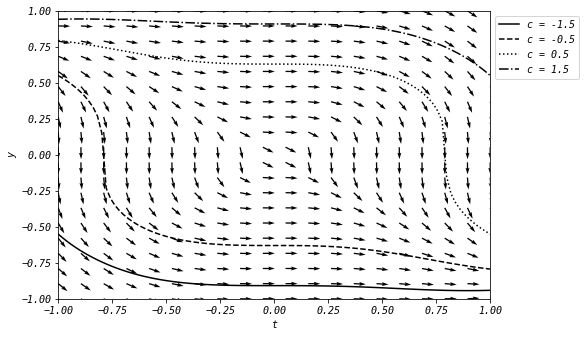

In [12]:
figexexact = plt.figure(figsize=(6,4))
axexexact = figexexact.add_axes([0,0,1,1])
axexexact.set_xlim(-1, 1)
axexexact.set_ylim(-1, 1)

style = ['-', '--', ':', '-.']
c = [-3/2, -1/2, 1/2, 3/2]
t = np.linspace(-1, 1, 100)
for i, value in enumerate(c):
    axexexact.plot(t, np.cbrt((value-t**3)/(2+t**4)), color='black', ls=style[i], label='c = {}'.format(value))
    
x,y = np.linspace(-1,1,20),np.linspace(-1,1,20)
x,y = np.meshgrid(x,y)
dx, dy = 1, -(4*x**3*y**3 + 3*x**2)/(3*x**4*y**2 + 6*y**2)
dx, dy, length = norm(dx, dy)
qq = axexexact.quiver(x,y,dx,dy, color='black')

axexexact.set_xlabel('t')
axexexact.set_ylabel('y')
axexexact.legend(loc='upper left', bbox_to_anchor=(1, 1))
figexexact.savefig("exexact.pdf",bbox_inches='tight')
plt.show()

### exheterolin

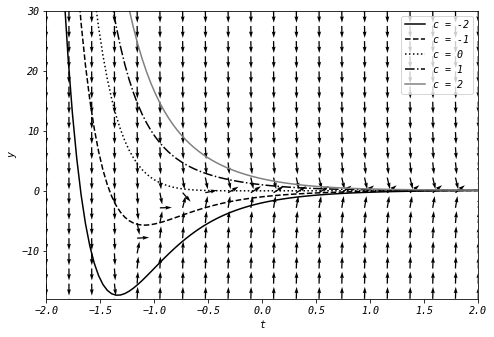

In [13]:
figexheterolin = plt.figure(figsize=(6,4))
axexheterolin = figexheterolin.add_axes([0,0,1,1])
axexheterolin.set_xlim(-2, 2)
axexheterolin.set_ylim(-18, 30)

col = ['black', 'black', 'black', 'black', 'grey']
style = ['-', '--', ':', '-.', '-']
c = [-2, -1, 0, 1, 2]
t = np.linspace(-2, 2, 100)
for i, value in enumerate(c):
    axexheterolin.plot(t, np.exp(-2*t)*(t**4/4 + value), color=col[i], ls=style[i], label='c = {}'.format(value))
    
x,y = np.linspace(-2,2,20),np.linspace(-18,30,20)
x,y = np.meshgrid(x,y)
dx, dy = 1, x**3*np.exp(-2*x)-2*y
dx, dy, length = norm(dx, dy)
qq = axexheterolin.quiver(x,y,dx,dy, color='black')

axexheterolin.set_xlabel('t')
axexheterolin.set_ylabel('y')
axexheterolin.legend()
figexheterolin.savefig("exheterolin.pdf",bbox_inches='tight')
plt.show()

### exhomolin

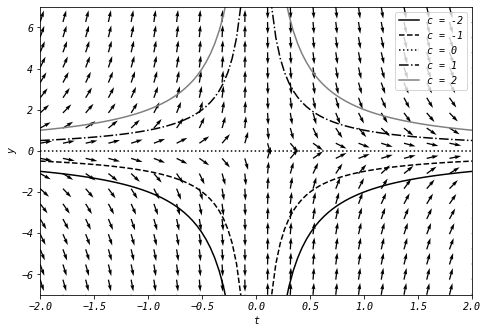

In [14]:
figexhomolin = plt.figure(figsize=(6,4))
axexhomolin = figexhomolin.add_axes([0,0,1,1])
axexhomolin.set_xlim(-2, 2)
axexhomolin.set_ylim(-7, 7)

col = ['black', 'black', 'black', 'black', 'grey']
style = ['-', '--', ':', '-.', '-']
c = [-2, -1, 0, 1, 2]
t = np.linspace(-2, 2, 100)
for i, value in enumerate(c):
    axexhomolin.plot(t, value/np.abs(t), color=col[i], ls=style[i], label='c = {}'.format(value))
    
x,y = np.linspace(-2,2,20),np.linspace(-7,7,20)
x,y = np.meshgrid(x,y)
dx, dy = 1, -y/x
dx, dy, length = norm(dx, dy)
qq = axexhomolin.quiver(x,y,dx,dy, color='black')

axexhomolin.set_xlabel('t')
axexhomolin.set_ylabel('y')
axexhomolin.legend()
figexhomolin.savefig("exhomolin.pdf",bbox_inches='tight')
plt.show()

### exRK4

In [15]:
def RK(f, y0, t):
    n = len(t)
    y = np.zeros(n)
    y[0] = y0
    dt = 80/n
    for i in range(0, n-1):
        k1 = f(y[i], t[i])
        k2 = f(y[i] + k1 * dt / 2, t[i] + dt / 2)
        k3 = f(y[i] + k2 * dt / 2, t[i] + dt / 2)
        k4 = f(y[i] + k3 * dt, t[i] + dt)
        y[i+1] = y[i] + (dt / 6) * (k1 + 2*k2 + 2*k3 + k4)
    return y

In [16]:
def fun(y, t):
    return 9.81-5.28*y/75

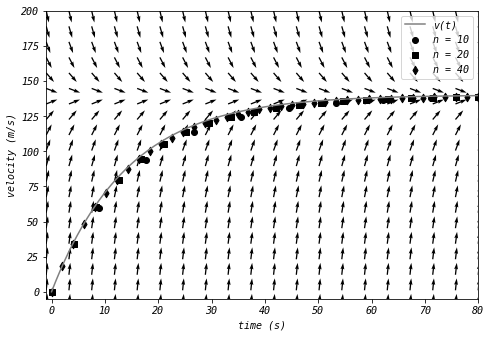

In [17]:
figexRK4 = plt.figure(figsize=(6,4))
axexRK4 = figexRK4.add_axes([0,0,1,1])
axexRK4.set_xlim(-1, 80)
axexRK4.set_ylim(-5, 200)

t = np.linspace(0, 80, 200)
axexRK4.plot(t, lam_t(t), color='grey', label='v(t)')

mark = ['o', 's', 'd']
n = [10, 20, 40]
dt = [8, 4, 2]
for i, value in enumerate(n):
    t = np.linspace(0, 80, value)
    y = RK(fun, 0, t)
    axexRK4.scatter(t, y, color='black', marker=mark[i], label='n = {}'.format(value))
    
x,y = np.linspace(-1,80,20),np.linspace(-10,200,20)
x,y = np.meshgrid(x,y)
dx, dy = 1, 9.81-5.28*y/75
dx, dy, length = norm(dx, dy)
qq = axexRK4.quiver(x,y,dx,dy, color='black')

axexRK4.set_xlabel('time (s)')
axexRK4.set_ylabel('velocity (m/s)')
axexRK4.legend()
figexRK4.savefig("exRK4.pdf",bbox_inches='tight')
plt.show()

### exRK4Fout

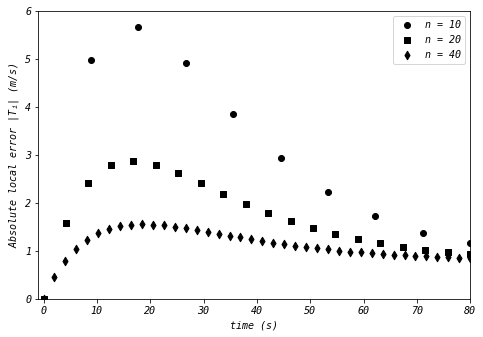

In [18]:
figexRK4Fout = plt.figure(figsize=(6,4))
axexRK4Fout = figexRK4Fout.add_axes([0,0,1,1])
axexRK4Fout.set_xlim(-1, 80)
axexRK4Fout.set_ylim(0, 6)

t = np.linspace(0, 80, 200)

mark = ['o', 's', 'd']
n = [10, 20, 40]
dt = [8, 4, 2]
for i, value in enumerate(n):
    t = np.linspace(0, 80, value)
    y = RK(fun, 0, t)
    axexRK4Fout.scatter(t, np.abs(y-lam_t(t)), color='black', marker=mark[i], label='n = {}'.format(value))

axexRK4Fout.set_xlabel('time (s)')
axexRK4Fout.set_ylabel('Absolute local error |T$_i$| (m/s)')
axexRK4Fout.legend()
figexRK4Fout.savefig("exRK4Fout.pdf",bbox_inches='tight')
plt.show()

### exsepcircles

<ipython-input-19-5db7d9da79d3>:7: RuntimeWarning: invalid value encountered in sqrt
  axexsepcircles.plot(x, np.sqrt(2 - x**2), color='black', ls='-', label='y(t) = $\sqrt{2-x^2}$')
<ipython-input-19-5db7d9da79d3>:9: RuntimeWarning: invalid value encountered in sqrt
  axexsepcircles.plot(x, -np.sqrt(5 - x**2), color='black', ls='--', label='y(t) = $\sqrt{5-x^2}$')


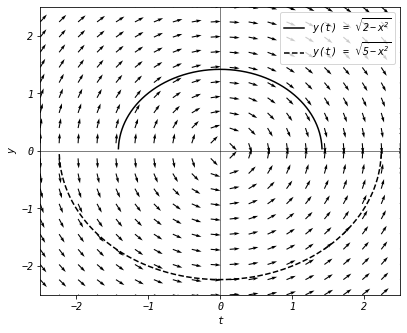

In [19]:
figexsepcircles = plt.figure(figsize=(5,4))
axexsepcircles = figexsepcircles.add_axes([0,0,1,1])
axexsepcircles.set_xlim(-2.5, 2.5)
axexsepcircles.set_ylim(-2.5, 2.5)

x = np.linspace(-np.sqrt(2), np.sqrt(2), 6000)
axexsepcircles.plot(x, np.sqrt(2 - x**2), color='black', ls='-', label='y(t) = $\sqrt{2-x^2}$')
x = np.linspace(-np.sqrt(5), np.sqrt(5), 6000)
axexsepcircles.plot(x, -np.sqrt(5 - x**2), color='black', ls='--', label='y(t) = $\sqrt{5-x^2}$')
axexsepcircles.plot([-2.5, 2.5], [0, 0], color='black', ls='-', lw=0.5)
axexsepcircles.plot([0,0], [-2.5, 2.5], color='black', ls='-', lw=0.5)

x,y = np.linspace(-2.5,2.5,20),np.linspace(-2.5,2.5,20)
x,y = np.meshgrid(x,y)
dx, dy = 1, -x/y
dx, dy, length = norm(dx, dy)
qq = axexsepcircles.quiver(x,y,dx,dy, color='black')

axexsepcircles.set_xlabel('t')
axexsepcircles.set_ylabel('y')
axexsepcircles.legend()
figexsepcircles.savefig("exsepcircles.pdf",bbox_inches='tight')
plt.show()

### exsepimplicit

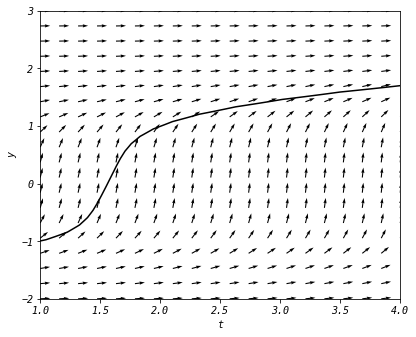

In [20]:
figexsepimplicit = plt.figure(figsize=(5,4))
axexsepimplicit = figexsepimplicit.add_axes([0,0,1,1])
axexsepimplicit.set_xlim(1, 4)
axexsepimplicit.set_ylim(-2, 3)

x = np.linspace(1, 4, 50)
y = np.linspace(-2, 3, 40)

X, Y = np.meshgrid(x, y)
Z = X**2+X-4 - Y**5 - Y
axexsepimplicit.contour(X, Y, Z, [0], colors='black')

x,y = np.linspace(1,4,20),np.linspace(-2,3,20)
x,y = np.meshgrid(x,y)
dx, dy = 1, 2*(x+1)/(5*y**4+1)
dx, dy, length = norm(dx, dy)

qq = axexsepimplicit.quiver(x,y,dx,dy, color='black')

axexsepimplicit.set_xlabel('t')
axexsepimplicit.set_ylabel('y')
figexsepimplicit.savefig("exsepimplicit.pdf",bbox_inches='tight')
plt.show()

### extrans1

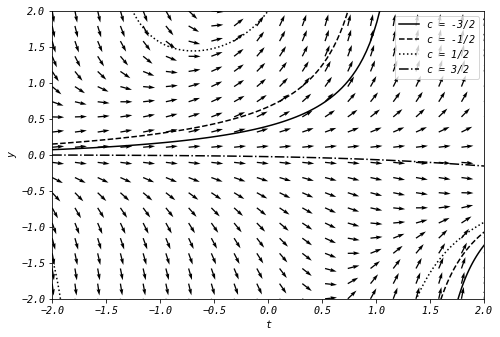

In [21]:
figextrans1 = plt.figure(figsize=(6,4))
axextrans1 = figextrans1.add_axes([0,0,1,1])
axextrans1.set_xlim(-2, 2)
axextrans1.set_ylim(-2, 2)

t = np.linspace(-2, 1.2, 100)
c = -3/2
axextrans1.plot(t, -1/(t-1+c*np.exp(-t)), color='black', label='c = -3/2')
t = np.linspace(1.5, 2, 100)
c = -3/2
axextrans1.plot(t, -1/(t-1+c*np.exp(-t)), color='black')

t = np.linspace(-2, 1, 100)
c = -1/2
axextrans1.plot(t, -1/(t-1+c*np.exp(-t)), color='black', ls='--', label='c = -1/2')
t = np.linspace(1.5, 2, 100)
c = -1/2
axextrans1.plot(t, -1/(t-1+c*np.exp(-t)), color='black', ls='--')

t = np.linspace(-2, -1.8, 100)
c = 1/2
axextrans1.plot(t, -1/(t-1+c*np.exp(-t)), color='black', ls=':', label='c = 1/2')
t = np.linspace(-1.5, 0.5, 100)
c = 1/2
axextrans1.plot(t, -1/(t-1+c*np.exp(-t)), color='black', ls=':')
t = np.linspace(1, 2, 100)
c = 1/2
axextrans1.plot(t, -1/(t-1+c*np.exp(-t)), color='black', ls=':')

c = 3/2
t = np.linspace(-2, 2, 100)
axextrans1.plot(t, -1/(t-1+value*np.exp(-t)), color='black', ls='-.', label='c = 3/2')
    
x,y = np.linspace(-2,2,20),np.linspace(-2,2,20)
x,y = np.meshgrid(x,y)
dx, dy = 1, x*y**2+y
dx, dy, length = norm(dx, dy)
qq = axextrans1.quiver(x,y,dx,dy, color='black')

axextrans1.set_xlabel('t')
axextrans1.set_ylabel('y')
axextrans1.legend()
figextrans1.savefig("extrans1.pdf",bbox_inches='tight')
plt.show()

### extrans2

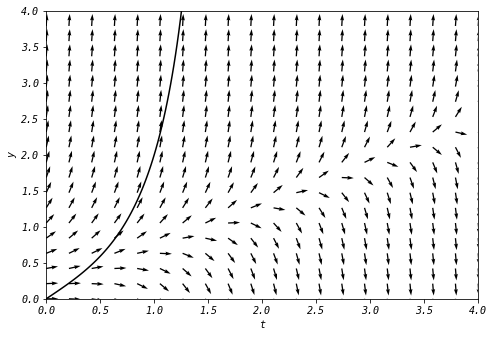

In [22]:
figextrans2 = plt.figure(figsize=(6,4))
axextrans2 = figextrans2.add_axes([0,0,1,1])
axextrans2.set_xlim(0, 4)
axextrans2.set_ylim(0, 4)

t = np.linspace(0, 1.5, 100)
axextrans2.plot(t, t*(1+t**2/3)/(1-t**2/3), color='black')
    
x,y = np.linspace(0,4,20),np.linspace(0,4,20)
x,y = np.meshgrid(x,y)
dx, dy = 1, y**2+x*y-x**2
dx, dy, length = norm(dx, dy)
qq = axextrans2.quiver(x,y,dx,dy, color='black')

axextrans2.set_xlabel('t')
axextrans2.set_ylabel('y')
figextrans2.savefig("extrans2.pdf",bbox_inches='tight')
plt.show()